Anuran Calls (MFCCs) Data Set

### Link to dataset:  https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29

In [1]:
# import dataset in csv format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [2]:
data = pd.read_csv('Anuran Calls (MFCCs)/Frogs_MFCCs.csv')

In [3]:
# Check the first few rows of the data
print(data.head())



   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
0 -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568  0.057684   
1 -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303  0.020140   
2 -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722 -0.025083   
3 -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498 -0.054766   
4 -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550 -0.031346   

   MFCCs_21  MFCCs_22           Family      Genus         Species  R

In [4]:
# Check for missing values
print(data.isnull().sum())


MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64


In [5]:

# Summary statistics
print(data.describe())



          MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.989885     0.323584     0.311224     0.445997     0.127046   
std       0.069016     0.218653     0.263527     0.160328     0.162722   
min      -0.251179    -0.673025    -0.436028    -0.472676    -0.636012   
25%       1.000000     0.165945     0.138445     0.336737     0.051717   
50%       1.000000     0.302184     0.274626     0.481463     0.161361   
75%       1.000000     0.466566     0.430695     0.559861     0.222592   
max       1.000000     1.000000     1.000000     1.000000     0.752246   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  ...   
mean      0.097939    -0.001397    -0.000370     0.128213     0.055998  ...   
std       0.120412     0.171404     0.116302     0.179008     0.127099  ...   
min      -0.41041

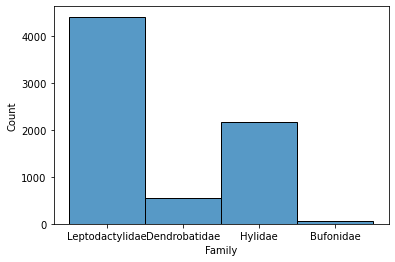

In [6]:
# Visualization (you can use matplotlib or seaborn library)
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Family'])
plt.show()

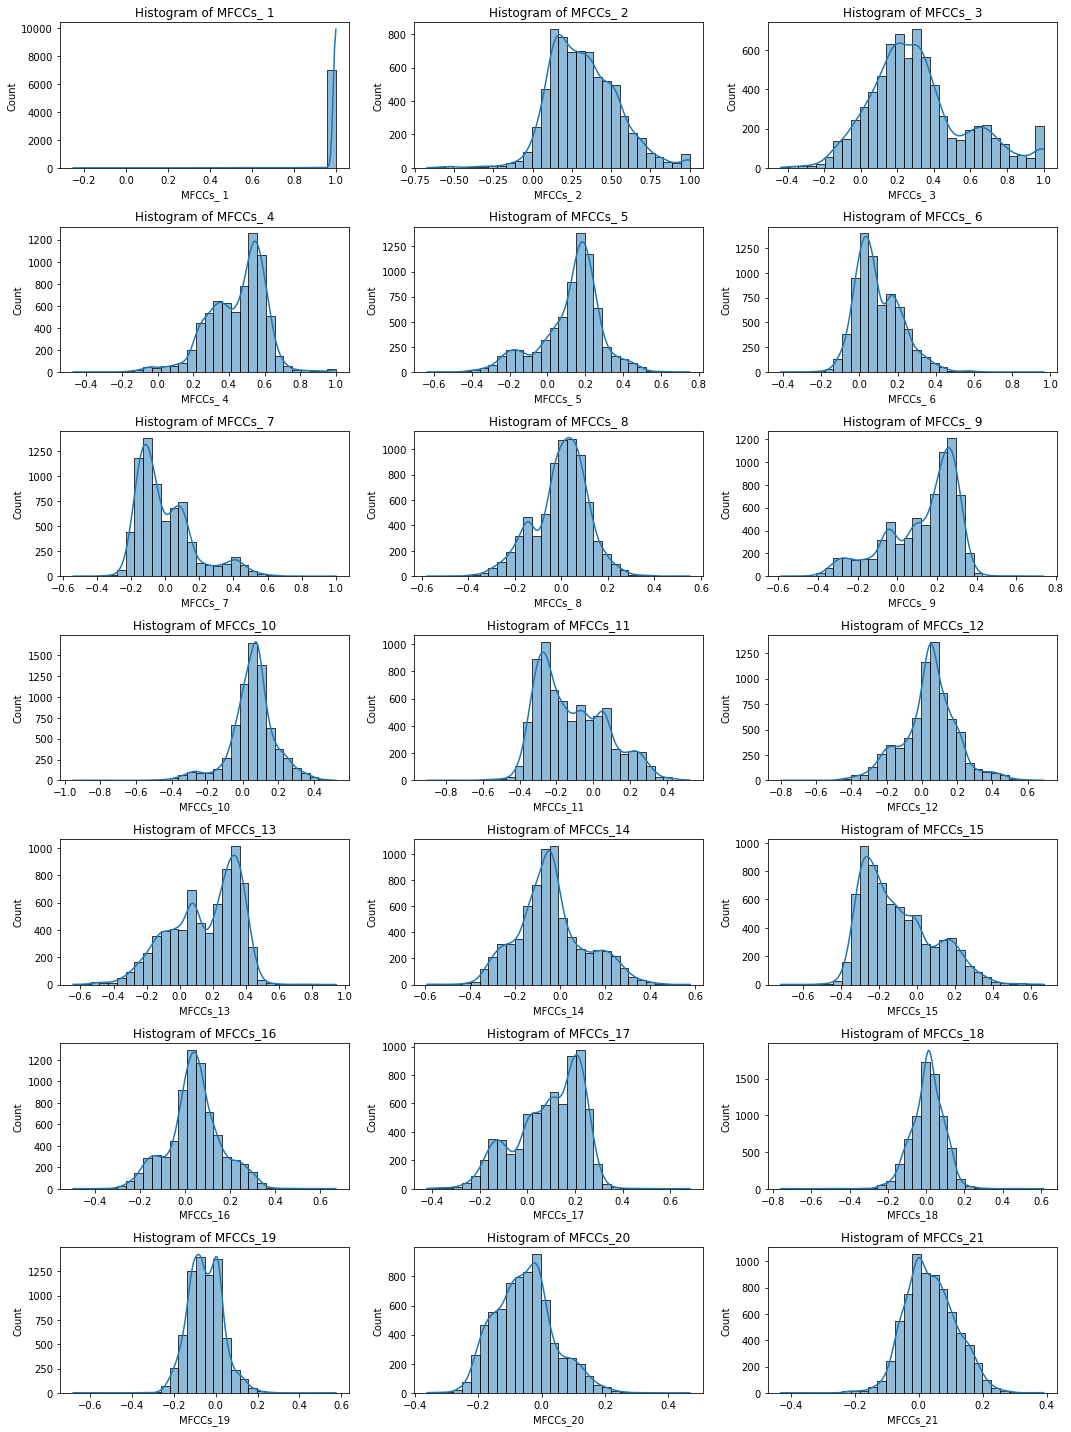

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of first 10 MFCC features
mfcc_features = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10','MFCCs_11','MFCCs_12','MFCCs_13','MFCCs_14','MFCCs_15','MFCCs_16','MFCCs_17','MFCCs_18','MFCCs_19','MFCCs_20','MFCCs_21']

# Create a figure and axes with matplotlib's subplots function
fig, axs = plt.subplots(7, 3, figsize=(15, 20))

# Reshape axs to 1-D
axs = axs.ravel()

# Plot histograms for each MFCC feature
for i, feature in enumerate(mfcc_features):
    sns.histplot(data[feature], bins=30, kde=True, ax=axs[i])
    axs[i].set_title(f'Histogram of {feature}')

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()


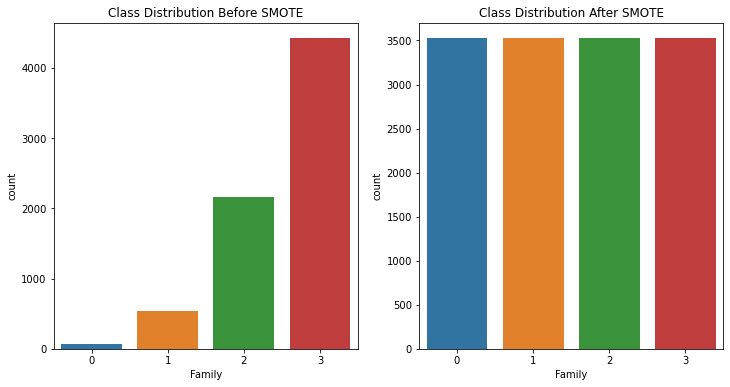

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the 'Family', 'Genus', and 'Species' columns
le = LabelEncoder()
data['Family'] = le.fit_transform(data['Family'])
data['Genus'] = le.fit_transform(data['Genus'])
data['Species'] = le.fit_transform(data['Species'])

# Define the features and the target
X = data.drop(['Family', 'Genus', 'Species', 'RecordID'], axis=1)
y = data['Family']  # or 'Family' or 'Genus' depending on what you want to classify



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Import necessary libraries
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE 
smote = SMOTE()

# Fit SMOTE on the dataset
X_smote, y_smote = smote.fit_resample(X_train, y_train)

X_train = X_smote
y_train = y_smote

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Before SMOTE
sns.countplot(x=y, ax=ax[0])
ax[0].set_title('Class Distribution Before SMOTE')
ax[0].set_xticks([0, 1, 2, 3])

# After SMOTE
sns.countplot(x=y_smote, ax=ax[1])
ax[1].set_title('Class Distribution After SMOTE')
ax[1].set_xticks([0, 1, 2, 3])

plt.show()




Model: Random Forest
Accuracy:  0.9909659485753995
Confusion Matrix:
 [[ 17   0   0   0]
 [  0 106   0   0]
 [  2   2 414   4]
 [  0   1   4 889]]
Precision:  0.9632913112550867
Recall:  0.9938624532162813
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       0.97      1.00      0.99       106
           2       0.99      0.98      0.99       422
           3       1.00      0.99      0.99       894

    accuracy                           0.99      1439
   macro avg       0.96      0.99      0.98      1439
weighted avg       0.99      0.99      0.99      1439



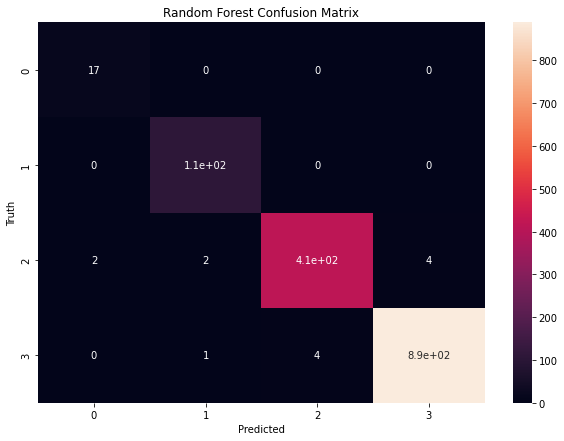

Model: KNN
Accuracy:  0.812369701181376
Confusion Matrix:
 [[ 16   0   1   0]
 [  0 106   0   0]
 [  2  69 331  20]
 [  0 132  46 716]]
Precision:  0.7706633061177388
Recall:  0.8816078786869562
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.35      1.00      0.51       106
           2       0.88      0.78      0.83       422
           3       0.97      0.80      0.88       894

    accuracy                           0.81      1439
   macro avg       0.77      0.88      0.78      1439
weighted avg       0.90      0.81      0.84      1439



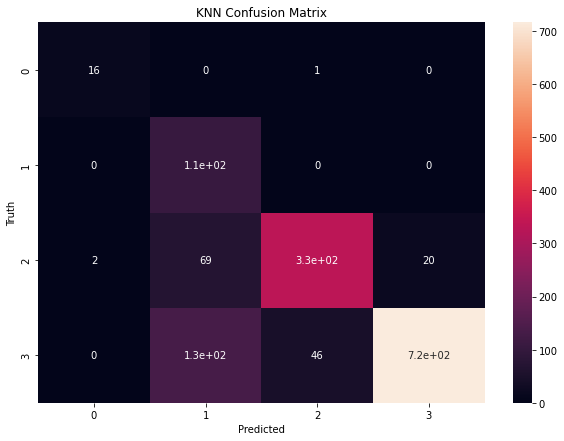

Model: Naive Bayes
Accuracy:  0.9909659485753995
Confusion Matrix:
 [[ 17   0   0   0]
 [  0 105   1   0]
 [  0   1 417   4]
 [  0   1   6 887]]
Precision:  0.9900774098575045
Recall:  0.9927219297187465
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.98      0.99      0.99       106
           2       0.98      0.99      0.99       422
           3       1.00      0.99      0.99       894

    accuracy                           0.99      1439
   macro avg       0.99      0.99      0.99      1439
weighted avg       0.99      0.99      0.99      1439



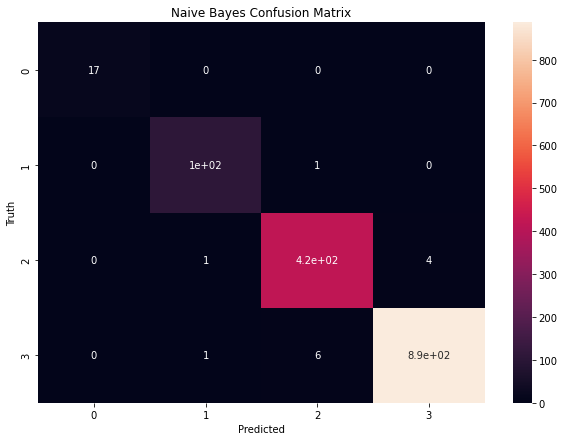

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
models = [ knn_model, nb_model,rf_model]

model_names = ['Random Forest', 'KNN', 'Naive Bayes']

for i in range(len(models)):
    print(f"Model: {model_names[i]}")
    models[i].fit(X_train, y_train)

    # Make predictions
    predictions = models[i].predict(X_test)
    print("Accuracy: ", accuracy_score(y_test, predictions))
    # Print confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:\n", cm)
    
    # Print precision and recall
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    print("Precision: ", precision)
    print("Recall: ", recall)
    
    # Print classification report
    print("Classification Report:\n", classification_report(y_test, predictions))
    
    # Plot confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f"{model_names[i]} Confusion Matrix")
    plt.show()
